## Regressão - Modelo Log-Linear

## O Dataset e o Projeto
<hr>

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>O mercado imobiliário vem sendo objeto de diversos estudos e pesquisas nos últimos tempos. A crise financeira que afeta a economia tem afetado significativamente os investimentos e ganhos advindos deste setor. Este cenário incentiva o aumento do interesse por estudos de previsão de demanda baseados em características deste mercado, dos imóveis e do entorno destes imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Neste contexto, o objetivo principal desse projeto é desenvolver um sistema de avaliação imobiliária utilizando a metodologia de regressões lineares que é uma das técnicas de machine learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nosso *dataset* é uma amostra aleatória de tamanho 5000 de imóveis disponíveis para venda no município do Rio de Janeiro.</p>

***

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (R$) de oferta do imóvel</li>
    <li><b>Area</b> - Área do imóvel em m²</li>
    <li><b>Dist_Praia</b> - Distância do imóvel até a praia (km) (em linha reta)</li>
    <li><b>Dist_Farmacia</b> - Distância do imóvel até a farmácia mais próxima (km) (em linha reta)</li>
</ul>

***

In [30]:
# Importação das Bibliotecas:

import pandas as pd
import numpy as np
import seaborn as sns

In [31]:
# Leitura dos dados:

dados = pd.read_csv('data/dados_imob.csv', sep = ';')

In [32]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


In [33]:
# Verificando o tamanho do dataset:

dados.shape

(5000, 4)

### Análises Preliminares -  Estatísticas Descritivas

In [34]:
dados.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


In [35]:
# MAtriz de Correlação:

dados.corr().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.00,0.71,-0.37,-0.02
Area,0.71,1.00,-0.28,-0.03
Dist_Praia,-0.37,-0.28,1.00,0.03
Dist_Farmacia,-0.02,-0.03,0.03,1.00


#### Os dados fornecidos pela matriz de correlação sugerem que:

* A variável 'Valor' tem relação positiva com a variável 'Area' e essa relação parece ser significativa;

* A variável 'Valor' tem relação negativa com a variável 'Dist_Praia'. Tal possível relação seria pertinente, tendo em vista que imóveis mais distantes da praia tendem a ter menor valor;

* A variável 'Valor' tem relação quase desprezível com a variável 'Dist_Farmácia'.

### Comportamento da variável dependente (y): Análise Gráfica

<AxesSubplot:title={'center':'Preço dos Imóveis'}, xlabel='Reais'>

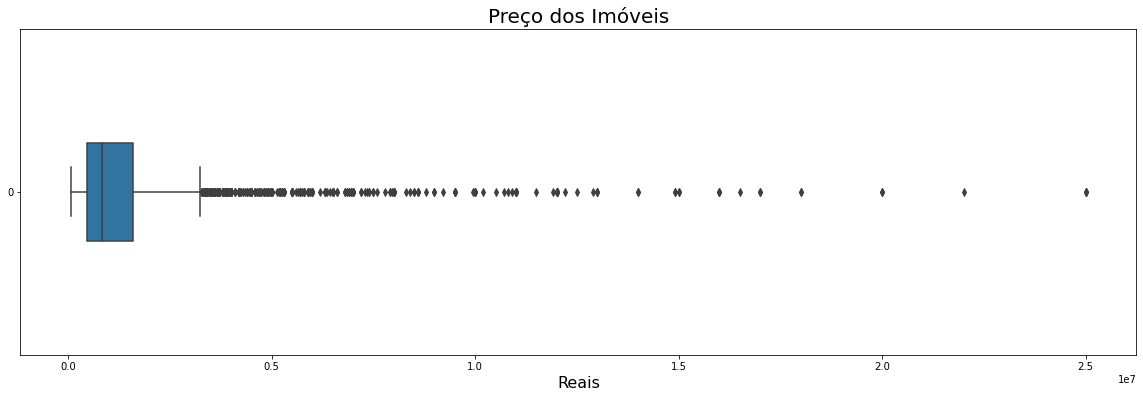

In [36]:
# Boxplot da variável dependente (y):

ax = sns.boxplot(data = dados['Valor'], orient = 'h', width = 0.3)
ax.figure.set_size_inches(20, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

#### O boxplot sugere uma assimetria à direita.
#### Não se pode concluir que todos os pontos à direita sejam outliers.

<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='Preço dos Imóveis (R$)', ylabel='Count'>

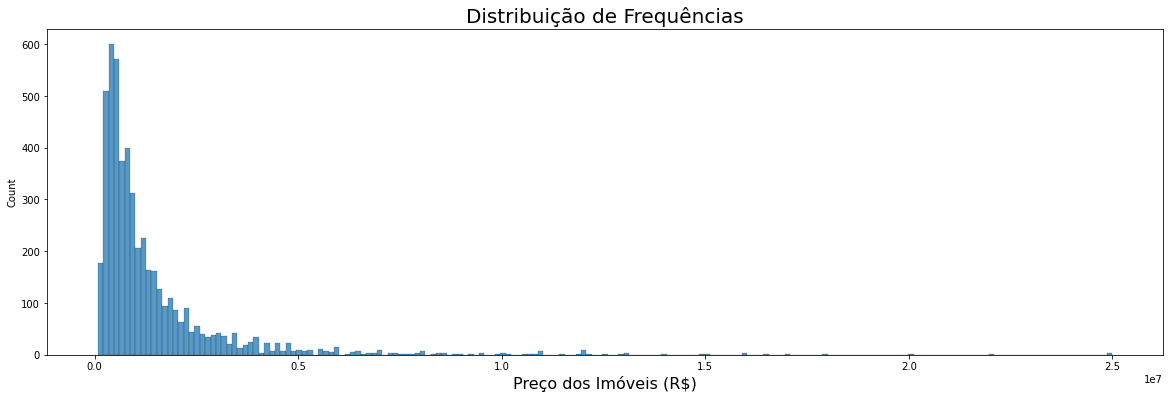

In [37]:
# Distribuição de feruências da variável dependente (y):

ax = sns.histplot(dados['Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
ax

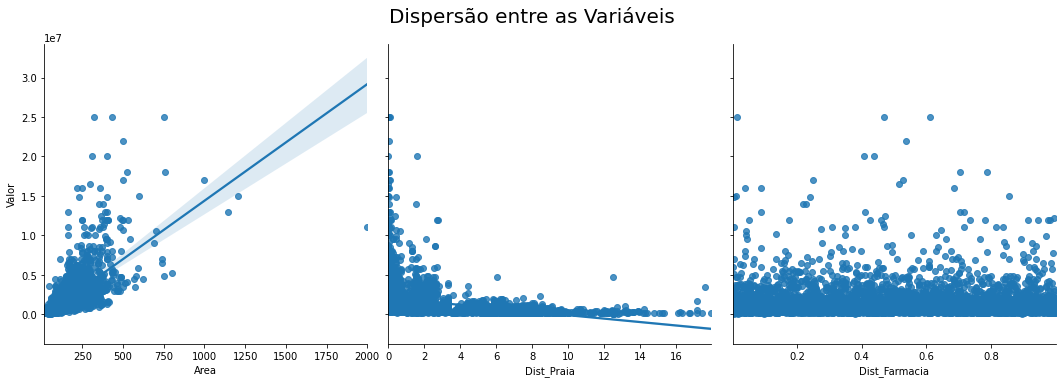

In [38]:
# Gráficos de dispersão entre as variáveis do dataset:

ax = sns.pairplot(dados, y_vars = 'Valor', x_vars = ['Area', 'Dist_Praia', 'Dist_Farmacia'],kind = 'reg', height = 5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

### Pela análise gráfica acima, nota-se que:

* Existe a possibilidade de os dados estarem dispostos assimetricamente (Assimetria à direita - observar boxplot e distribuição de frequências da variável 'Valor')

* O relacionamento das variáveis independentes ('Area', 'Dist_Praia', Dist_Farmacia') não é o desejado.

### Aplicação da transformação logarítmica aos dados do dataset:

In [39]:
dados['Log_Valor'] = np.log(dados['Valor'])
dados['Log_Area'] = np.log(dados['Area'])
dados['Log_Dist_Praia'] = np.log(dados['Dist_Praia']+1)
dados['Log_Dist_Farmacia'] = np.log(dados['Dist_Farmacia']+1)

#### Observando a análise preliminar das estatísticas descritivas, notou-se valores mínimos das variáveis 'Dist_Praia'e 'Dist_Farmacia' iguais a zero. 

#### Para que a transformação logarítmica seja realizada de forma correta, somou-se 1 aos valores dessas variáveis.

In [40]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,Log_Valor,Log_Area,Log_Dist_Praia,Log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


### Analisando novamente os gráficos da distribuição de frequências da variável 'Valor' ANTES e DEPOIS da transformação logarítmica:

### ANTES:

<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='Preço dos Imóveis (R$)', ylabel='Count'>

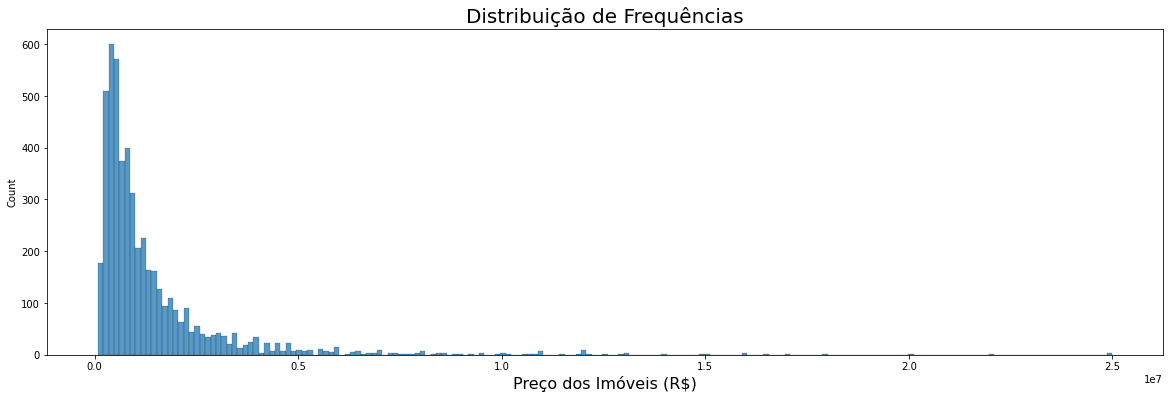

In [41]:
# Distribuição de feruências da variável dependente (y):

ax = sns.histplot(dados['Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
ax

### DEPOIS:

<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='log do Preço dos Imóveis', ylabel='Count'>

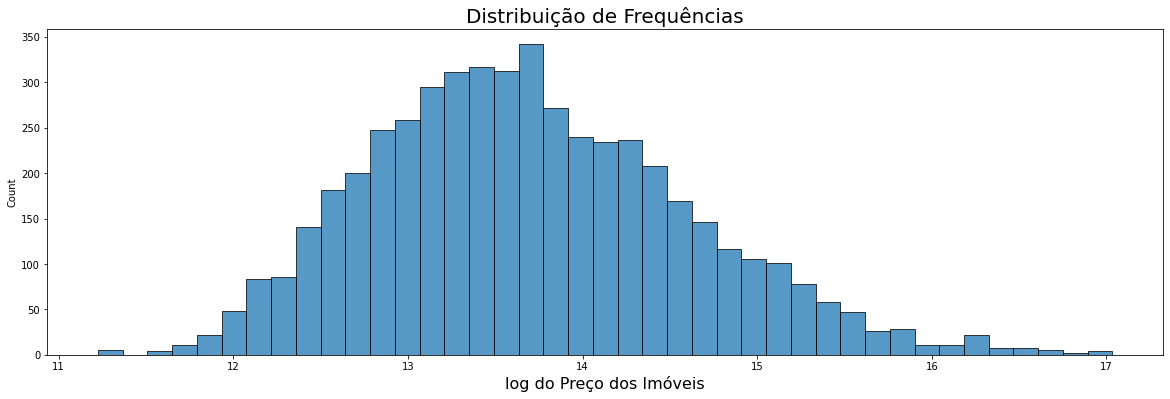

In [42]:
ax = sns.histplot(dados['Log_Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Preço dos Imóveis', fontsize=16)
ax

### Verificando, novamente, a relação linear entre as variáveis transformadas:

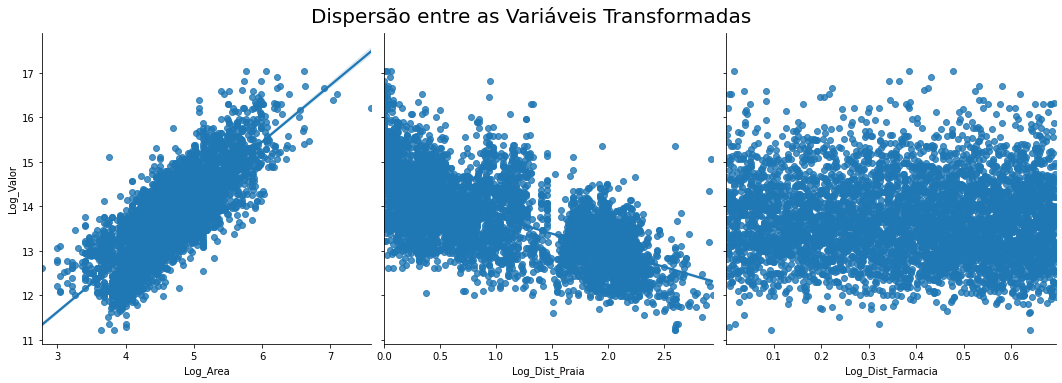

In [43]:
ax = sns.pairplot(dados, y_vars = 'Log_Valor', x_vars = ['Log_Area', 'Log_Dist_Praia', 'Log_Dist_Farmacia'],kind = 'reg', height = 5)
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
ax

#### Nos gráficos das variáveis transformadas 'Log_Area' e 'Log_Dist_Praia' já observam-se melhor relacionamento com a variável 'Log_Valor'.

#### No entanto, tal êxito não é verificado com a variável 'Log_Dist_Farmacia'. Talvez a variável não seja estatísticamente relevante para o modelo. 

### Verificando-se comportamento mais ajustado das variáveis, o modelo será elaborado levando em conta as variáveis transformadas.

In [44]:
from sklearn.model_selection import train_test_split 

In [45]:
# Preparação e separação dos dados do dataset:

y = dados['Log_Valor']
X = dados[['Log_Area', 'Log_Dist_Praia', 'Log_Dist_Farmacia']]

In [46]:
# Divisão aleatória dos dados em dados de treino e dados de teste:

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 2811)

In [47]:
# Estimando o modelo:

import statsmodels.api as sm

In [48]:
# Adicionando a constante 1 para a criação do modelo:

X_treino_com_constante = sm.add_constant(X_treino)

In [49]:
# Criação do modelo:

modelo_statsmodels = sm.OLS(y_treino, X_treino_com_constante, hasconst = True).fit()

### Avaliação do modelo estimado:

In [50]:
modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                        07:59:35   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.060    154.734      0.000       9.223       9.460
Log_Area              1.0580      0.012     89.320      0.000       1.035       1.081
Log_Dist_Praia       -0.4905      0.009    -56.690      0.000      -0.508      -0.474
Log_Dist_Farmacia    -0.0167      0.032     -0.521      0.603      -0.080       0.046
==============================================================================
Omnibus:                       64.751   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.858
Skew:                           0.136   Prob(JB):                     6.25e-24
Kurtosis:                       3.753   Cond. No.                         47.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Pelas informações obtidas acima, avalia-se:

* Em relação a variável 'Log_Dist_Farmacia', P>|t| > 0.05. Confirmando a suspeita anterior, a variável 'Log_Dist_Farmacia' não é relevante para o modelo.

### Modificando o Modelo e Avaliando Novamente o Ajuste - Removendo a variável irrelevante ('Log_Dist_Farmácia'):

In [51]:
# Preparação e separação dos dados do dataset:

X = dados[['Log_Area', 'Log_Dist_Praia']]

In [52]:
# Divisão aleatória dos dados em dados de treino e dados de teste:

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 2811)

In [53]:
# Adicionando a constante 1 para a criação do modelo:

X_treino_com_constante = sm.add_constant(X_treino)

In [54]:
modelo_statsmodels = sm.OLS(y_treino, X_treino_com_constante, hasconst = True).fit()

## Avaliando as estatísticas de teste do novo modelo

In [55]:
modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                        08:00:09   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.353      0.000       9.219       9.450
Log_Area           1.0581      0.012     89.345      0.000       1.035       1.081
Log_Dist_Praia    -0.4906      0.009    -56.709      0.000      -0.508      -0.474
==============================================================================
Omnibus:                       65.115   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.712
Skew:                           0.136   Prob(JB):                     4.08e-24
Kurtosis:                       3.757   Cond. No.                         46.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Estimando o Modelo com os Dados de Treino

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [58]:
modelo = LinearRegression()

In [59]:
modelo.fit(X_treino, y_treino)

LinearRegression()

## Gerando previsões para os dados de TESTE (X_test)

In [60]:
y_previsto = modelo.predict(X_teste)

In [61]:
# Calculando o R²:

R_2_2 = metrics.r2_score(y_teste, y_previsto).round(3)
R_2_2

0.79

## Gerando previsão pontual

In [63]:
# Dados de entrada para a previsão:

entrada = X_teste[0:1]
entrada

,Log_Area,Log_Dist_Praia
1006,5.273,1.282769


In [64]:
modelo.predict(entrada)[0]

14.28482006184788

#### Tendo em vista que foi realizada uma transformação logarítmica, faz-se necessário reverter esta transformação a fim de obtermos valores em reais.

In [65]:
# Valores em reais:

np.exp(modelo.predict(entrada)[0])

1598889.784779439

In [66]:
# Simulador simples:

Area = 250
Dist_Praia = 1

# Agora é necessário transformar os valores reais para a escala logarítmica para fazer as previsões:

entrada = [[np.log(Area), np.log(Dist_Praia + 1)]]

# Reverter a transformação novamente:
np.exp(modelo.predict(entrada))[0]

2777292.8403123356

### Obtenção dos coeficientes da regressão:

In [67]:
# Valor da constante, em reais, retirado o efeito das outras variáveis:

np.exp(modelo.intercept_)

11326.681428069842

In [68]:
# Coeficientes:

modelo.coef_

array([ 1.05807818, -0.49061226])

In [69]:
# Confirmando a ordem das variáveis explicativas no DataFrame

X.columns

Index(['Log_Area', 'Log_Dist_Praia'], dtype='object')

In [70]:
# Criando uma lista com os nomes das variáveis do modelo

index = ['Intercepto', 'Log_Area', 'Log_Distância até a praia']

In [72]:
# Criando um DataFrame para armazenar os coeficientes do modelo:

pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_), index = index, columns = ['Parâmetros'])

,Parâmetros
Intercepto,9.334916
Log_Area,1.058078
Log_Distância até a praia,-0.490612


### Interpretação dos coeficientes do modelo:

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=0$) o efeito médio no Preço dos Imóveis seria de <b>R$ 11.326,68</b> (exp[9.334916]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Área (m²)</b> → Mantendo-se o valor de $X_3$ (Distância até a Praia) constante, um acréscimo de 1% na Área de um imóvel gera, em média, um acréscimo de <b>1.06%</b> no Preço do Imóvel.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distância até a Praia (km)</b> → Mantendo-se o valor de $X_2$ (Área) constante, um acréscimo de 1% na Distância de um imóvel até a praia gera, em média, um decréscimo de <b>0.49%</b> no Preço do Imóvel.
</p>